<a href="https://colab.research.google.com/github/Zheren1999/HealthTrack/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [5]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.5.0+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
Computer vision is a field in CS that focuses on enabling computers to identify and understand obkects ans people in videos and images.
#3 industries:
Health - image Segemntaions ans scans
Automotive Technologies: Object recognition on Traffic
Software Industry: Onject recognition on food

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
Overfitting is like memorizing for a test but then you can't answer a question that's slightly different.
Overfitting is the ML behavior when the mode is trained very good on the training data, but can not give accurate predictions on the new (testing data)
Why it can happen? because the training data is not representing the 'right data'
For example, we are trying to do classisication on the dog images.
If the training data contained a lot of picture of the dog in the park.
During training the computer can recognise the grass as the feature, leading to Overfitting
because our test data oly containing the picture of the dog not in the park.
Model can not learn right and doing error in testing data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
from typing_extensions import dataclass_transform
1. Cross validations
We need to devide our data to K subsets
-Keep one subset as the validation data and train the model on the remaining k-1 subsets
-Observe how the model perform on the validation subset
- Score the model performance based on putput data
2. Increase the training dataclass_transform
4. Feature selcetion
Check which features are not importnant and remove then


## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [1]:
import torch
import torchvision
from torchvision import datasets, transforms
train_data = torchvision.datasets.MNIST(root = 'data', train = True, download = True, transform = transforms.ToTensor() )
test_data = torchvision.datasets.MNIST(root = 'data', train = False, download = True, transform = transforms.ToTensor() )

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 54.5MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.64MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.7MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.70MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [2]:
len(train_data), len(test_data)

(60000, 10000)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

torch.Size([1, 28, 28])
5


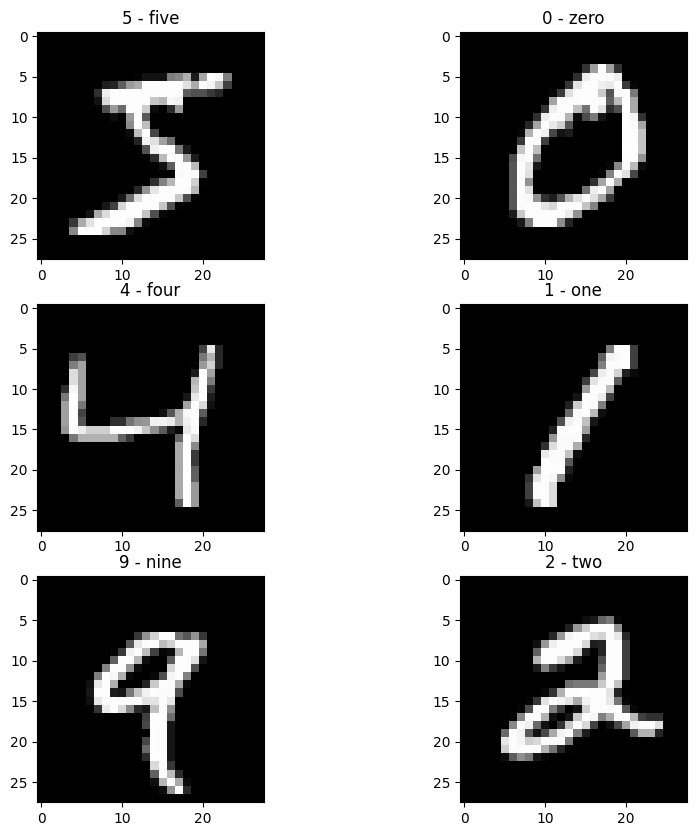

In [3]:
import matplotlib.pyplot as plt
import numpy as np
class_names= train_data.classes
random_indx= torch.randint(0, len(train_data), size = (6, ))
rows = 3
cols = 2
print(train_data[0][0].shape) #shape of the picture 1, 28, 28, - color channel, pixels in each directions
#print(train_data[0][1].shape) 'int' object has no attribute 'shape'
print(train_data[0][1]) #label for the picture
plt.figure(figsize =(10,10))
for i in range (len(random_indx)):
  plt.subplot(rows, cols, i+1)
  image, label = train_data[i]

  plt.imshow(image.squeeze(dim = 0), cmap = 'gray')
  plt.title(class_names[label])



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [7]:
from torch.utils.data import DataLoader
train_dataLoader = DataLoader(train_data, batch_size = 32, shuffle=True)
test_dataLoader=DataLoader(test_data, batch_size = 32, shuffle = False)
train_dataLoader, test_dataLoader

(<torch.utils.data.dataloader.DataLoader at 0x7b59178952d0>,
 <torch.utils.data.dataloader.DataLoader at 0x7b5917894ee0>)

In [14]:
for sample in next(iter(train_dataLoader)):
  print(sample.shape)
len(train_dataLoader), len(test_dataLoader)


torch.Size([32, 1, 28, 28])
torch.Size([32])


(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [52]:
import torch
from torch import nn
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
    super().__init__()
    self.conv1_block=nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units, kernel_size = 3, stride=1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels=hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.conv2_block=nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units, kernel_size = 3, stride=1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels=hidden_units, kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features = len(class_names))
    )
  def forward(self, x:torch.Tensor):
    x= self.conv1_block(x)
    x = self.conv2_block(x)
    x = self.classifier(x)
    return x

In [53]:
model2 = MNISTModelV0(input_shape = 1, hidden_units = 10, output_shape = len(class_names))

In [48]:
device = 'cuda'if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [49]:
model2.to(device)

MNISTModelV0(
  (conv1_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2_block): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [42]:
def train_step(model:torch.nn.Module,
               dataLoader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device: torch.device= device):
  model.to(device)
  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(dataLoader):
    X,y = X.to(device), y.to(device)
    y_pred = model(X)
    loss=loss_fn(y_pred, y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss=train_loss/len(dataLoader)
  print(f'Train loss:{train_loss:.4f}')


def test_step(model:torch.nn.Module,
               dataLoader: torch.utils.data,
               loss_fn: torch.nn.Module,
               device: torch.device):
  model.to(device)
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataLoader):
      X,y = X.to(device), y.to(device)
      y_pred = model(X)
      loss=loss_fn(y_pred, y)
      test_loss+=loss


    test_loss=test_loss/len(dataLoader)
    print(f'Test loss:{test_loss}')

In [50]:
torch.manual_seed(42)
from timeit import default_timer as timer

def timer_fn(start:int, end:int, device: torch.device):
  total_time = end-start
  print(f'Total time on device {device} is {total_time} in sec')

In [54]:
from tqdm.auto import tqdm
epochs = 3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(), lr = 0.1)
start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f'Epoch:{epoch}\n-------')
  train_step(model=model2, dataLoader = train_dataLoader, loss_fn = loss_fn, optimizer = optimizer, device = device)
  test_step(model = model2, dataLoader = test_dataLoader, loss_fn = loss_fn, device = device)
  end_time = timer()
timer_fn(start = start_time, end = end_time, device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Train loss:0.5295
Test loss:0.10142256319522858
Epoch:1
-------
Train loss:0.0757
Test loss:0.0587298609316349
Epoch:2
-------
Train loss:0.0571
Test loss:0.046388886868953705
Total time on device cpu is 182.70628778399987 in sec


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [70]:
def make_predictions(model:torch.nn.Module, data:list, device :torch.device):
  pred_prob = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = sample.to(device)
      sample= sample.unsqueeze(dim = 0)
      pred_logits =model(sample)
      pred_prob.append(torch.softmax(pred_logits, dim = 1).argmax(dim = 1))
  return pred_prob

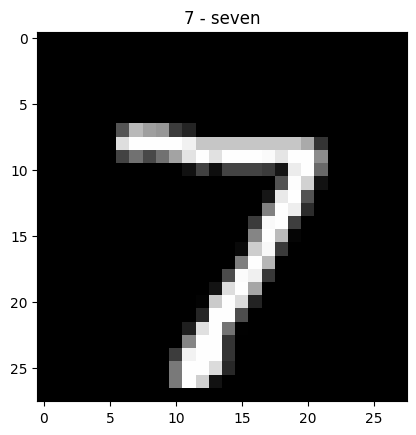

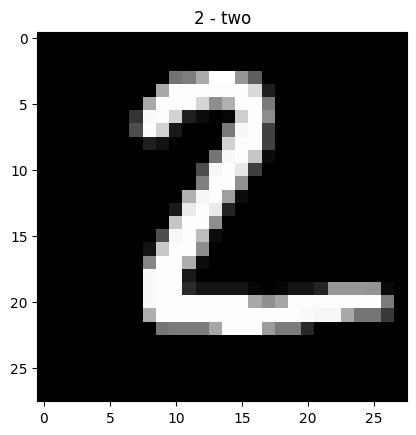

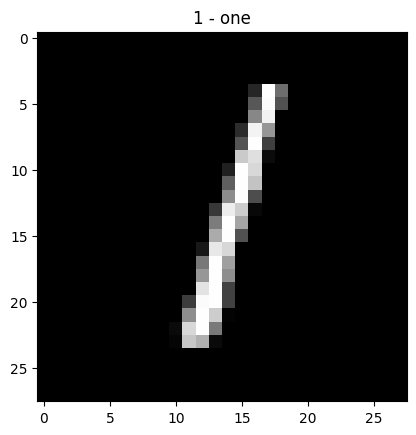

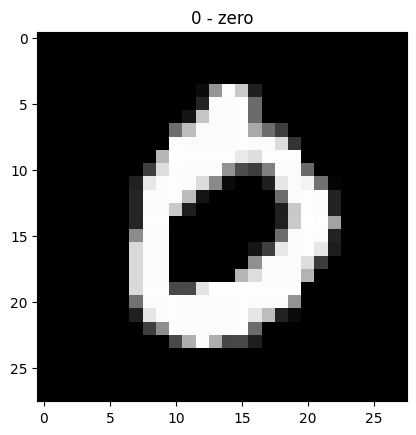

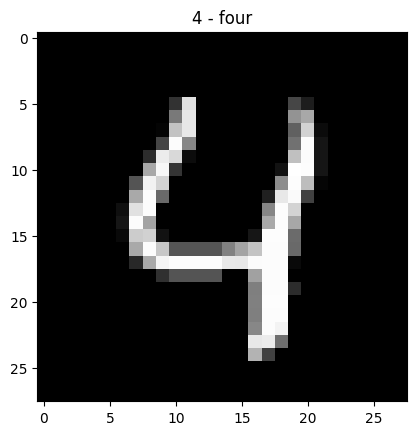

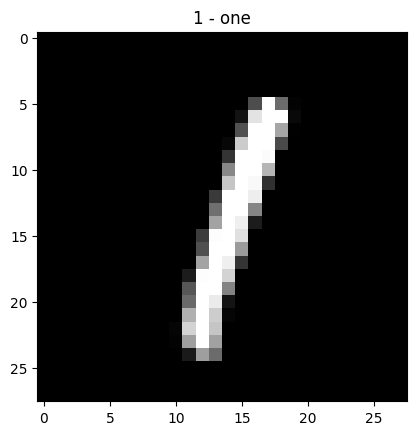

In [72]:
test_samples = []
test_labels = []
random_indx = torch.randint(0, len(test_data), size =(6,))
for i in range (len(random_indx)):
  test_samples.append(test_data[i][0])
  test_labels.append(test_data[i][1])
  plt.imshow(test_data[i][0].squeeze(dim = 0), cmap = 'gray')
  plt.title(class_names[test_data[i][1]])
  plt.show()

In [73]:
pred=make_predictions(model = model2, data=test_samples, device =device)
pred

[tensor([7]), tensor([2]), tensor([1]), tensor([0]), tensor([4]), tensor([1])]

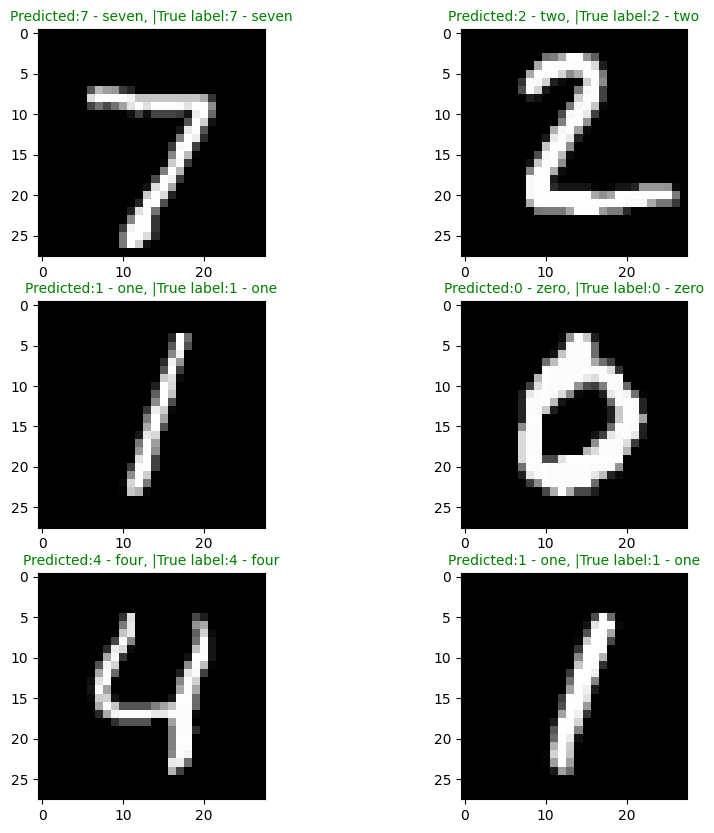

In [76]:
plt.figure(figsize =(10,10))
rows = 3
cols = 2
for i, sample in enumerate(test_samples):
  plt.subplot(rows, cols, i+1)
  plt.imshow(sample.squeeze(dim = 0), cmap ='gray')
  pred_label = class_names[pred[i]]
  truth_label = class_names[test_labels[i]]
  if pred_label==truth_label:
    plt.title(f'Predicted:{pred_label}, |True label:{truth_label}', c = 'green', fontsize = 10)
  else:
    plt.title(f'Predicted:{pred_label}, |True label:{truth_label}', c = 'red', fontsize = 10)


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [77]:
try:
  import torchmatrix, mlxtend
  print('Both packages are already installed')
except:
  !pip install torchmetrics
  !pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 13.6 MB/s eta 0:00:00


In [81]:
#import tqdm.auto
from tqdm.auto import tqdm
y_pred=[]
model2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataLoader):
    X, y=X.to(device), y.to(device)
    y_logits = model2(X)
    y_prediction = torch.softmax(y_logits.squeeze(), dim=0).argmax(dim = 1)
    y_pred.append(y_prediction.cpu())

#Concatelate list predictions into tensor
y_pred = torch.cat(y_pred)
y_pred

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

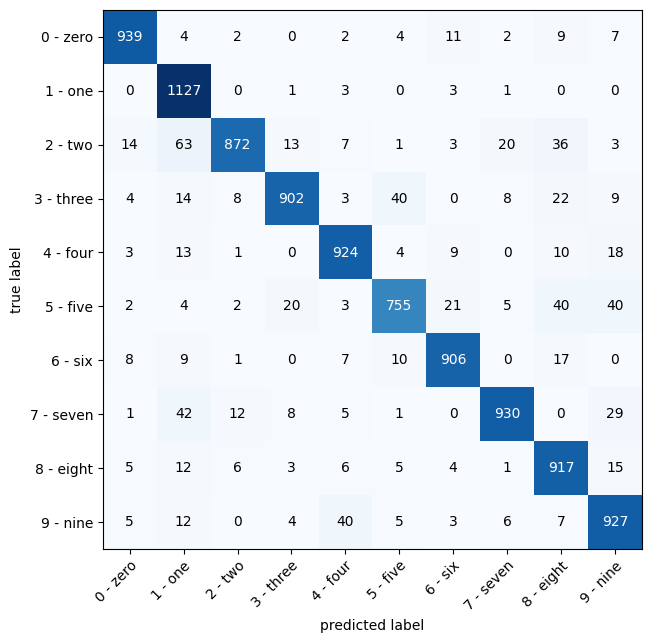

In [83]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [87]:
random_tensor = torch.rand([1,3,64,64])
print(f'SHape before transformation {random_tensor.shape}')
layer = nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3, stride = 2, padding = 1)
transform=layer(random_tensor)
print(f'Shape after transformatio:{transform.shape}')

SHape before transformation torch.Size([1, 3, 64, 64])
Shape after transformatio:torch.Size([1, 10, 32, 32])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [92]:
from torchvision import datasets
from torchvision import transforms

fashion_mnist_train = datasets.FashionMNIST(root=".",
                                            download=True,
                                            train=True,
                                            transform=transforms.ToTensor())

fashion_mnist_test = datasets.FashionMNIST(root=".",
                                           train=False,
                                           download=True,
                                           transform=transforms.ToTensor())

len(fashion_mnist_train), len(fashion_mnist_test)

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.7MB/s]


Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 303kB/s]


Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 5.45MB/s]


Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 16.5MB/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



(60000, 10000)

In [94]:
class_names = fashion_mnist_train.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [95]:
from torch.utils.data import DataLoader
train_dataLoader = DataLoader(fashion_mnist_train, batch_size = 32, shuffle=True)
test_dataLoader=DataLoader(fashion_mnist_test, batch_size = 32, shuffle = False)

In [96]:
model2=MNISTModelV0(input_shape = 1, hidden_units = 10, output_shape = len(class_names))

In [97]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(), lr = 0.1)

In [98]:
from tqdm.auto import tqdm
epochs = 3
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(), lr = 0.1)
start_time = timer()
for epoch in tqdm(range(epochs)):
  print(f'Epoch:{epoch}\n-------')
  train_step(model=model2, dataLoader = train_dataLoader, loss_fn = loss_fn, optimizer = optimizer, device = device)
  test_step(model = model2, dataLoader = test_dataLoader, loss_fn = loss_fn, device = device)
  end_time = timer()
timer_fn(start = start_time, end = end_time, device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Train loss:0.5596
Test loss:0.3855104148387909
Epoch:1
-------
Train loss:0.3519
Test loss:0.336606502532959
Epoch:2
-------
Train loss:0.3202
Test loss:0.33941563963890076
Total time on device cpu is 185.70267026500005 in sec


In [103]:
# Make predictions with trained model_2
test_preds = []
model2.eval()
with torch.inference_mode():
  for X_test, y_test in tqdm(test_dataLoader):
    y_logits = model2(X_test.to(device))
    y_pred_probs = torch.softmax(y_logits, dim=1)
    y_pred_labels = torch.argmax(y_pred_probs, dim=1)
    test_preds.append(y_pred_labels)
test_preds = torch.cat(test_preds).cpu() # matplotlib likes CPU
test_preds[:10], len(test_preds)

  0%|          | 0/313 [00:00<?, ?it/s]

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), 10000)

In [104]:

# Get wrong prediction indexes
import numpy as np
wrong_pred_indexes = np.where(test_preds != fashion_mnist_test.targets)[0]
len(wrong_pred_indexes)

1200

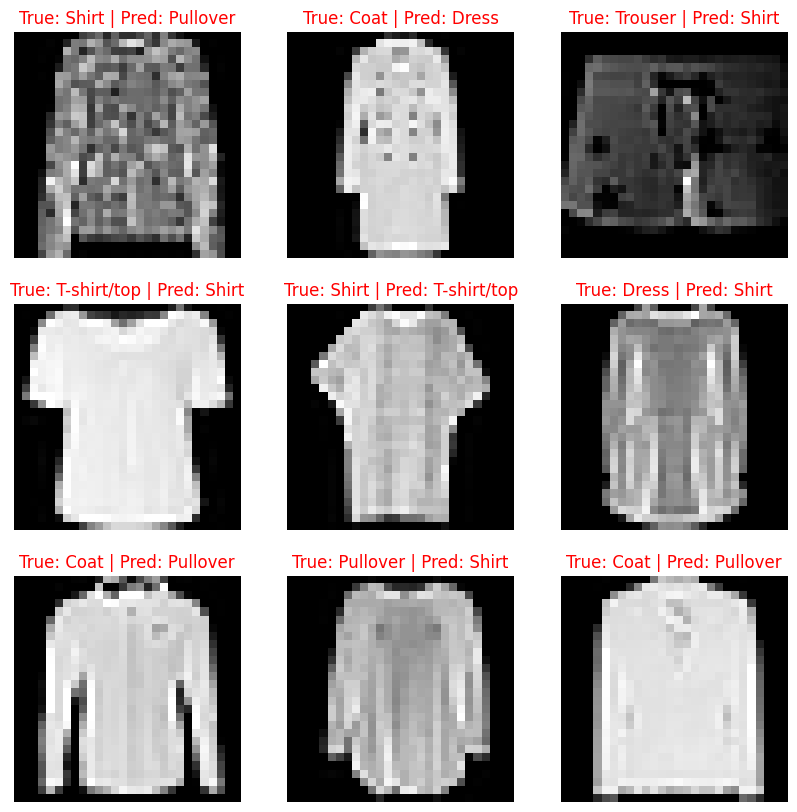

In [112]:

# Select random 9 wrong predictions and plot them
import random
random_selection = random.sample(list(wrong_pred_indexes), k=9)

plt.figure(figsize=(10, 10))
for i, idx in enumerate(random_selection):
  # Get true and pred labels
  true_label = class_names[fashion_mnist_test[idx][1]]
  pred_label = class_names[test_preds[idx]]

  # Plot the wrong prediction with its original label
  plt.subplot(3, 3, i+1)
  plt.imshow(fashion_mnist_test[idx][0].squeeze(), cmap="gray")
  plt.title(f"True: {true_label} | Pred: {pred_label}", c="r")
  plt.axis(False);